In [1]:
import ctypes

In [2]:
%%file suma_int.c
int suma_int(int a, int b){
    return a+b;
}

Writing suma_int.c


In [3]:
! gcc -c suma_int.c

In [4]:
! gcc -shared suma_int.o -o suma_int.so

In [5]:
def ctypes_suma_int():
    lib = ctypes.CDLL('./suma_int.so')
    lib.suma_int.argtypes = [ctypes.c_int, ctypes.c_int]
    lib.suma_int
    return lib.suma_int

In [6]:
c_suma_int = ctypes_suma_int()

In [7]:
c_suma_int(10,5)

15

In [8]:
c_suma_int(20,15)

35

In [9]:
c_suma_int(50,25)

75

Ejemplo 2

In [10]:
%%file num_exp.c
#include <math.h>
double num_exp(double a, double b){
    return pow(a,b);
}


Writing num_exp.c


In [11]:
! gcc -c num_exp.c -lm 

In [12]:
! gcc -shared num_exp.o -o num_exp.so

In [13]:
def ctypes_num_exp():
    libfile = './num_exp.so'
    lib = ctypes.CDLL(libfile)
    lib.num_exp.argtypes = [ctypes.c_double, ctypes.c_double]
    lib.num_exp.restype = ctypes.c_double
    return lib.num_exp

In [14]:
c_num_exp = ctypes_num_exp()

In [15]:
c_num_exp(2,3)

8.0

In [16]:
c_num_exp(2,0.5)

1.4142135623730951

In [17]:
c_num_exp(3,0.5)

1.7320508075688772

In [18]:
res = c_num_exp(2,0.5)

In [19]:
ref = 2 ** 0.5

In [20]:
err_rel = abs(ref - res) / abs(ref)

In [21]:
err_rel

0.0

Ejemplo 3

In [25]:
%%file ord_burbuja_int.c
void ord_burbuja_int(int* arr, int size){
    int i, j, temp;
    for (i = 0; i < size-1; i++){
        for(j=0; j < size-1-i; j++){
            if (arr[j] > arr[j+1]){
                temp = arr[j];
                arr[j] = arr[j+1];
                arr[j+1] = temp;
            }
        }
    }
}

Overwriting ord_burbuja_int.c


In [26]:
! gcc -c ord_burbuja_int.c

In [27]:
! gcc -shared ord_burbuja_int.o -o ord_burbuja_int.so

In [28]:
import numpy as np

In [29]:
def ctypes_ord_burbuja_int():
    libfile = './ord_burbuja_int.so'
    lib = ctypes.CDLL(libfile)
    lib.ord_burbuja_int.argtypes = [np.ctypeslib.ndpointer(dtype=np.int32), ctypes.c_int]
    return lib.ord_burbuja_int

In [30]:
c_ord_burbuja_int = ctypes_ord_burbuja_int()

In [31]:
arr = np.asarray([9,5,4,3,1,7,2,8]).astype(np.int32)

In [32]:
arr

array([9, 5, 4, 3, 1, 7, 2, 8], dtype=int32)

In [33]:
arr.size

8

In [34]:
c_ord_burbuja_int(arr, arr.size)

7

In [35]:
arr

array([1, 2, 3, 4, 5, 7, 8, 9], dtype=int32)

In [36]:
l = np.asarray([9,5,4,3,1,7,2,8]).astype(np.int32)

In [37]:
def py_ord_burbuja_int(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [38]:
py_ord_burbuja_int(l)

In [39]:
l

array([1, 2, 3, 4, 5, 7, 8, 9], dtype=int32)

In [40]:
from numpy import linalg as LA

In [41]:
arr = np.asarray([9,5,4,3,1,7,2,8]).astype(np.int32)

In [42]:
c_ord_burbuja_int(arr, arr.size)

7

In [43]:
arr

array([1, 2, 3, 4, 5, 7, 8, 9], dtype=int32)

In [44]:
LA.norm(l-arr) / LA.norm(l)

0.0

In [57]:
import time

In [59]:
np.random.randint(5, size=(20))

array([1, 3, 0, 1, 3, 2, 2, 3, 1, 2, 2, 1, 4, 1, 2, 3, 4, 3, 2, 4])

In [60]:
tams = 2 ** np.arange(5,11)

In [61]:
tams

array([  32,   64,  128,  256,  512, 1024])

In [62]:
veces = 50

In [63]:
t_py = []
t_c = []

In [64]:
tam = tams[0]

In [65]:
arr = np.random.randint(256, size=(tam)).astype(np.int32)
py_arr = arr.copy()
c_arr = arr.copy()
t_py_i = []
t_c_i = []

In [66]:
for i in range(veces):
    tic = time.perf_counter()
    py_ord_burbuja_int(py_arr)
    toc = time.perf_counter()
    t_py_i.append(toc-tic)


    tic = time.perf_counter()
    c_ord_burbuja_int(c_arr, c_arr.size)
    toc = time.perf_counter()

    t_c_i.append(toc-tic)


In [67]:
import matplotlib.pyplot as plt

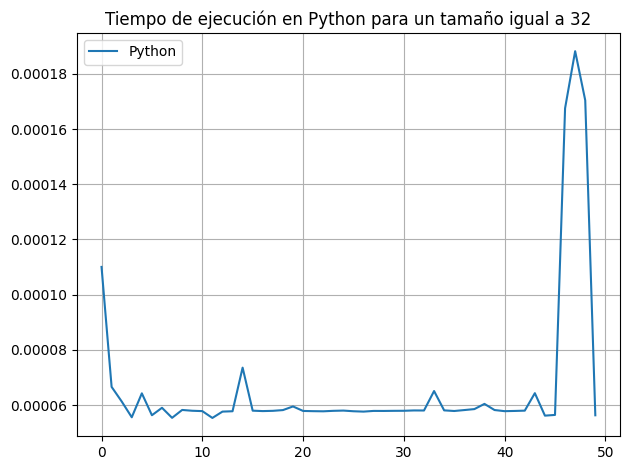

In [68]:
plt.plot(range(veces), t_py_i, label='Python')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución en Python para un tamaño igual a {tam}')
plt.tight_layout()

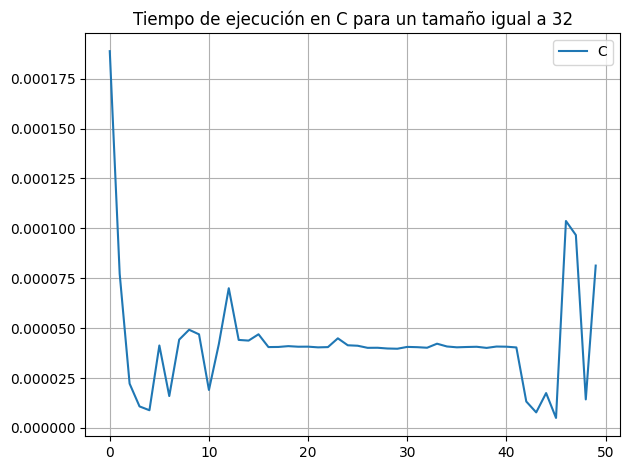

In [69]:
plt.plot(range(veces), t_c_i, label='C')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución en C para un tamaño igual a {tam}')
plt.tight_layout()

In [70]:
import statistics

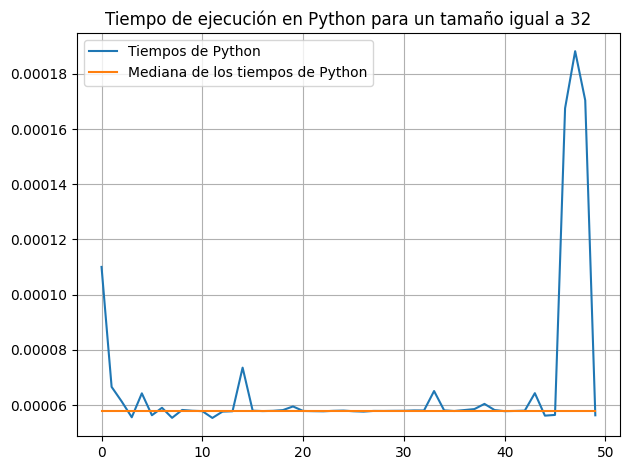

In [71]:
plt.plot(range(veces), t_py_i, label='Tiempos de Python')
plt.plot(range(veces), [statistics.median(t_py_i)]*len(t_py_i),label='Mediana de los tiempos de Python')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución en Python para un tamaño igual a {tam}')
plt.tight_layout()

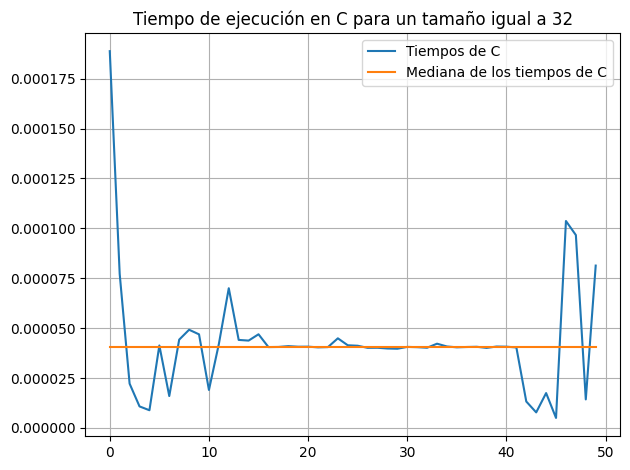

In [72]:
plt.plot(range(veces), t_c_i, label='Tiempos de C')
plt.plot(range(veces), [statistics.median(t_c_i)]*len(t_c_i),label='Mediana de los tiempos de C')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución en C para un tamaño igual a {tam}')
plt.tight_layout()

In [73]:
for tam in tams:
  # se crea el arreglo
  arr = np.random.randint(256, size=(tam)).astype(np.int32)
  # agumento para la función de Python
  py_arr = arr.copy()
  # argumento para la función de C
  c_arr = arr.copy()
  # lista para las 50 mediciones de Python
  t_py_i = []
  # lista para las 50 mediciones de C
  t_c_i = []

  for i in range(veces):
    # se empieza a medir el tiempo de la función de Python
    tic = time.perf_counter()
    # se llama a la función de Python
    py_ord_burbuja_int(py_arr)
    # se termina de medir el tiempo de la función de Python
    toc = time.perf_counter()
    # se guarda la medición en la lista de Python
    t_py_i.append(toc-tic)

    # se empieza a medir el tiempo de la función de C
    tic = time.perf_counter()
    # se llama a la función de C
    c_ord_burbuja_int(c_arr, c_arr.size)
    # se termina de medir el tiempo de la función de C
    toc = time.perf_counter()
    # se guarda la medición en la lista de C
    t_c_i.append(toc-tic)

  # se guarda la mediana de las 50 mediciones de Python
  t_py.append(statistics.median(t_py_i))
  # se guarda la mediana de las 50 mediciones de C
  t_c.append(statistics.median(t_c_i))

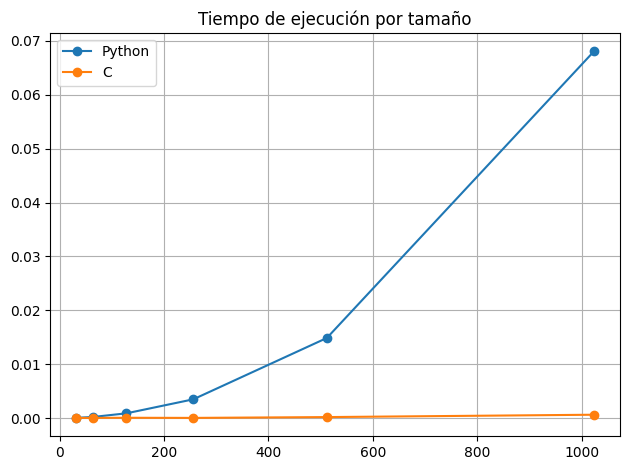

In [74]:
plt.plot(tams, t_py, '-o', label='Python')
plt.plot(tams, t_c, '-o', label='C')
plt.legend()
plt.grid(True)
plt.title('Tiempo de ejecución por tamaño')
plt.tight_layout()

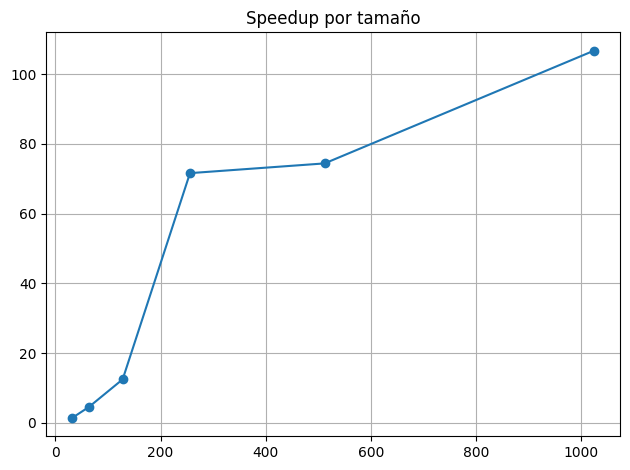

In [75]:
plt.plot(tams, np.asarray(t_py)/np.asarray(t_c), '-o')
plt.grid(True)
plt.title('Speedup por tamaño')
plt.tight_layout()

Ejemplo 4

In [76]:
%%file ord_burbuja_2_int.c
#include <string.h>
void ord_burbuja_2_int(int* arr, int* res, int size){
    memcpy(res, arr, size * sizeof(int));
    int i, j, temp;
    for (i=0; i < size-1; i++){
        for(j=0; j< size-1-i; j++){
            if(res[j] > res[j+1]){
                temp = res[j];
                res[j] = res[j+1];
                res[j+1] = temp;
            }
        }
    }
}

Writing ord_burbuja_2_int.c


In [78]:
! gcc -c ord_burbuja_2_int.c

In [79]:
! gcc -shared ord_burbuja_2_int.o -o ord_burbuja_2_int.so

In [80]:
def ctypes_ord_burbuja_2_int():
    libfile = './ord_burbuja_2_int.so'

    lib = ctypes.CDLL(libfile)

    lib.ord_burbuja_2_int.argtypes = [np.ctypeslib.ndpointer(dtype=np.int32), np.ctypeslib.ndpointer(dtype=np.int32), ctypes.c_int]
    return lib.ord_burbuja_2_int

In [82]:
c_ord_burbuja_2_int_raw = ctypes_ord_burbuja_2_int()

In [81]:
arr = np.asarray([9, 5, 4, 3, 1, 7, 2, 8]).astype(np.int32)
res = np.zeros_like(arr)

In [83]:
c_ord_burbuja_2_int_raw(arr, res, arr.size)

7

In [84]:
arr

array([9, 5, 4, 3, 1, 7, 2, 8], dtype=int32)